In [65]:
import sys
sys.path.append(R'E:\Data science\Titanic dataset\notebooks')

# Importing needed libraries
from auto_imports import *
model_results_imports()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

Load training dataset and predicting dataset

In [66]:
train_RF_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\training_data.csv')
predict_RF_df = pd.read_csv(r'E:\Data science\Titanic dataset\data\Processed data\Data Modeling\predicting_data.csv')

train_RF_df.head()

,Pclass,Age,SibSp,Parch,Fare,cell_number,Cabin_letter,Title,FamilyName,Special Agent/route,TicketBatch,SharedTicket,Male,Embarked_C,Embarked_S,Survived
0,3,-0.595254,1,0,-0.312011,0.300857,0.318282,0.155646,0.000000,0.083836,0,0,1,0,1,0
1,1,0.635996,1,0,2.461242,0.384292,0.329517,0.771706,0.384292,0.668414,0,0,0,1,0,1
2,3,-0.287441,0,0,-0.282777,0.309474,0.329517,0.721047,0.384292,0.599342,0,0,0,0,1,1
3,1,0.405137,1,0,1.673732,0.384292,0.329517,0.771706,0.384292,0.387213,0,0,0,0,1,1
4,3,0.405137,0,0,-0.277363,0.296900,0.325708,0.153592,1.000000,0.387708,0,0,1,0,1,0


In [67]:
train_RF_df['Survived'].unique()

array([0, 1])

### Fitting the model

In [68]:
# Spliting x and y
X = train_RF_df.drop('Survived' , axis =1)
y= train_RF_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42 ,
                                                    stratify=y)

In [69]:
# Fitting the model
RF_ = RandomForestClassifier(random_state=20 , class_weight='balanced',
                           )

# Use accuracy_f1_scores to get f1_score and accuracy score 

Accuracy , f1 = accuracy_f1_scores(X_train , y_train, RF_)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.8455136412882892
f1:  0.7922925114828148
   Accuracy score  F1 score
0        0.839161  0.785047
1        0.846154  0.788462
2        0.866197  0.825688
3        0.823944  0.778761
4        0.852113  0.783505


In [70]:
RF_.fit(X_train , y_train) # Fitting the model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
# See accuracy and f1 drop percentage
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , RF_ , Accuracy , f1).values()

print('Accuracy drop percentage: ' , accuracy_DP)
print('F1 drop percentage: ' , f1_DP)

Accuracy drop percentage:  3.5%
F1 drop percentage:  5.0%


In [72]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



This a good percentage, so:
#### Model results:
- Accuracy: 83%
- F1: 76%
- balanced model
- there aren't any asign for overfitting and underfitting
> This model is strongly fitted and very strong model
- I will decrease threshold to increase recall 

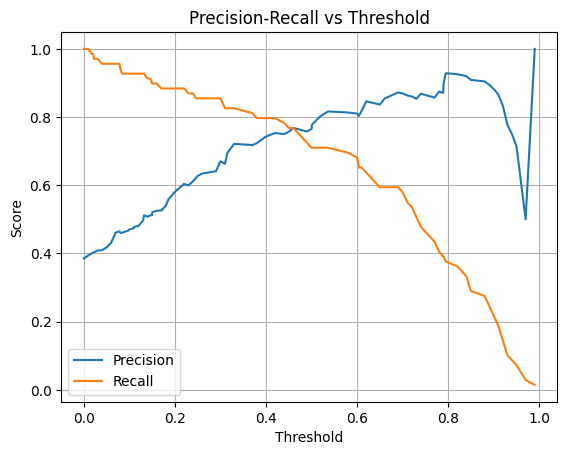

In [73]:
from sklearn.metrics import precision_recall_curve

y_probs = RF_.predict_proba(X_test)[:, 1]  # get probability of class 1

# calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import precision_recall_curve

y_probs = RF_.predict_proba(X_test)[:, 1]  # get probability of class 1

y_pred_custom = y_probs >= 0.4

print(classification_report(y_test , y_pred_custom))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.74      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



That's made model very good and ready to ensembling

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

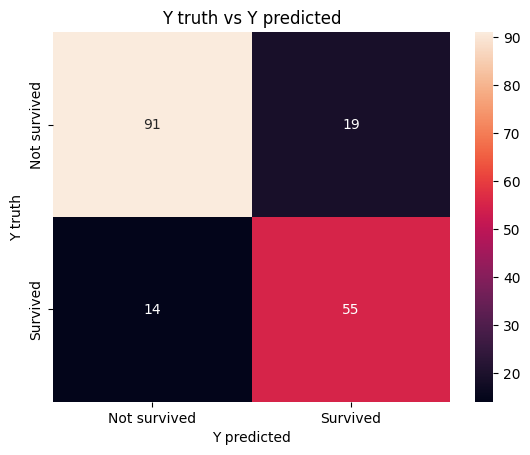

In [75]:
# plotting confusion matrix in heatmap
cm = confusion_matrix(y_test , y_pred_custom)
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

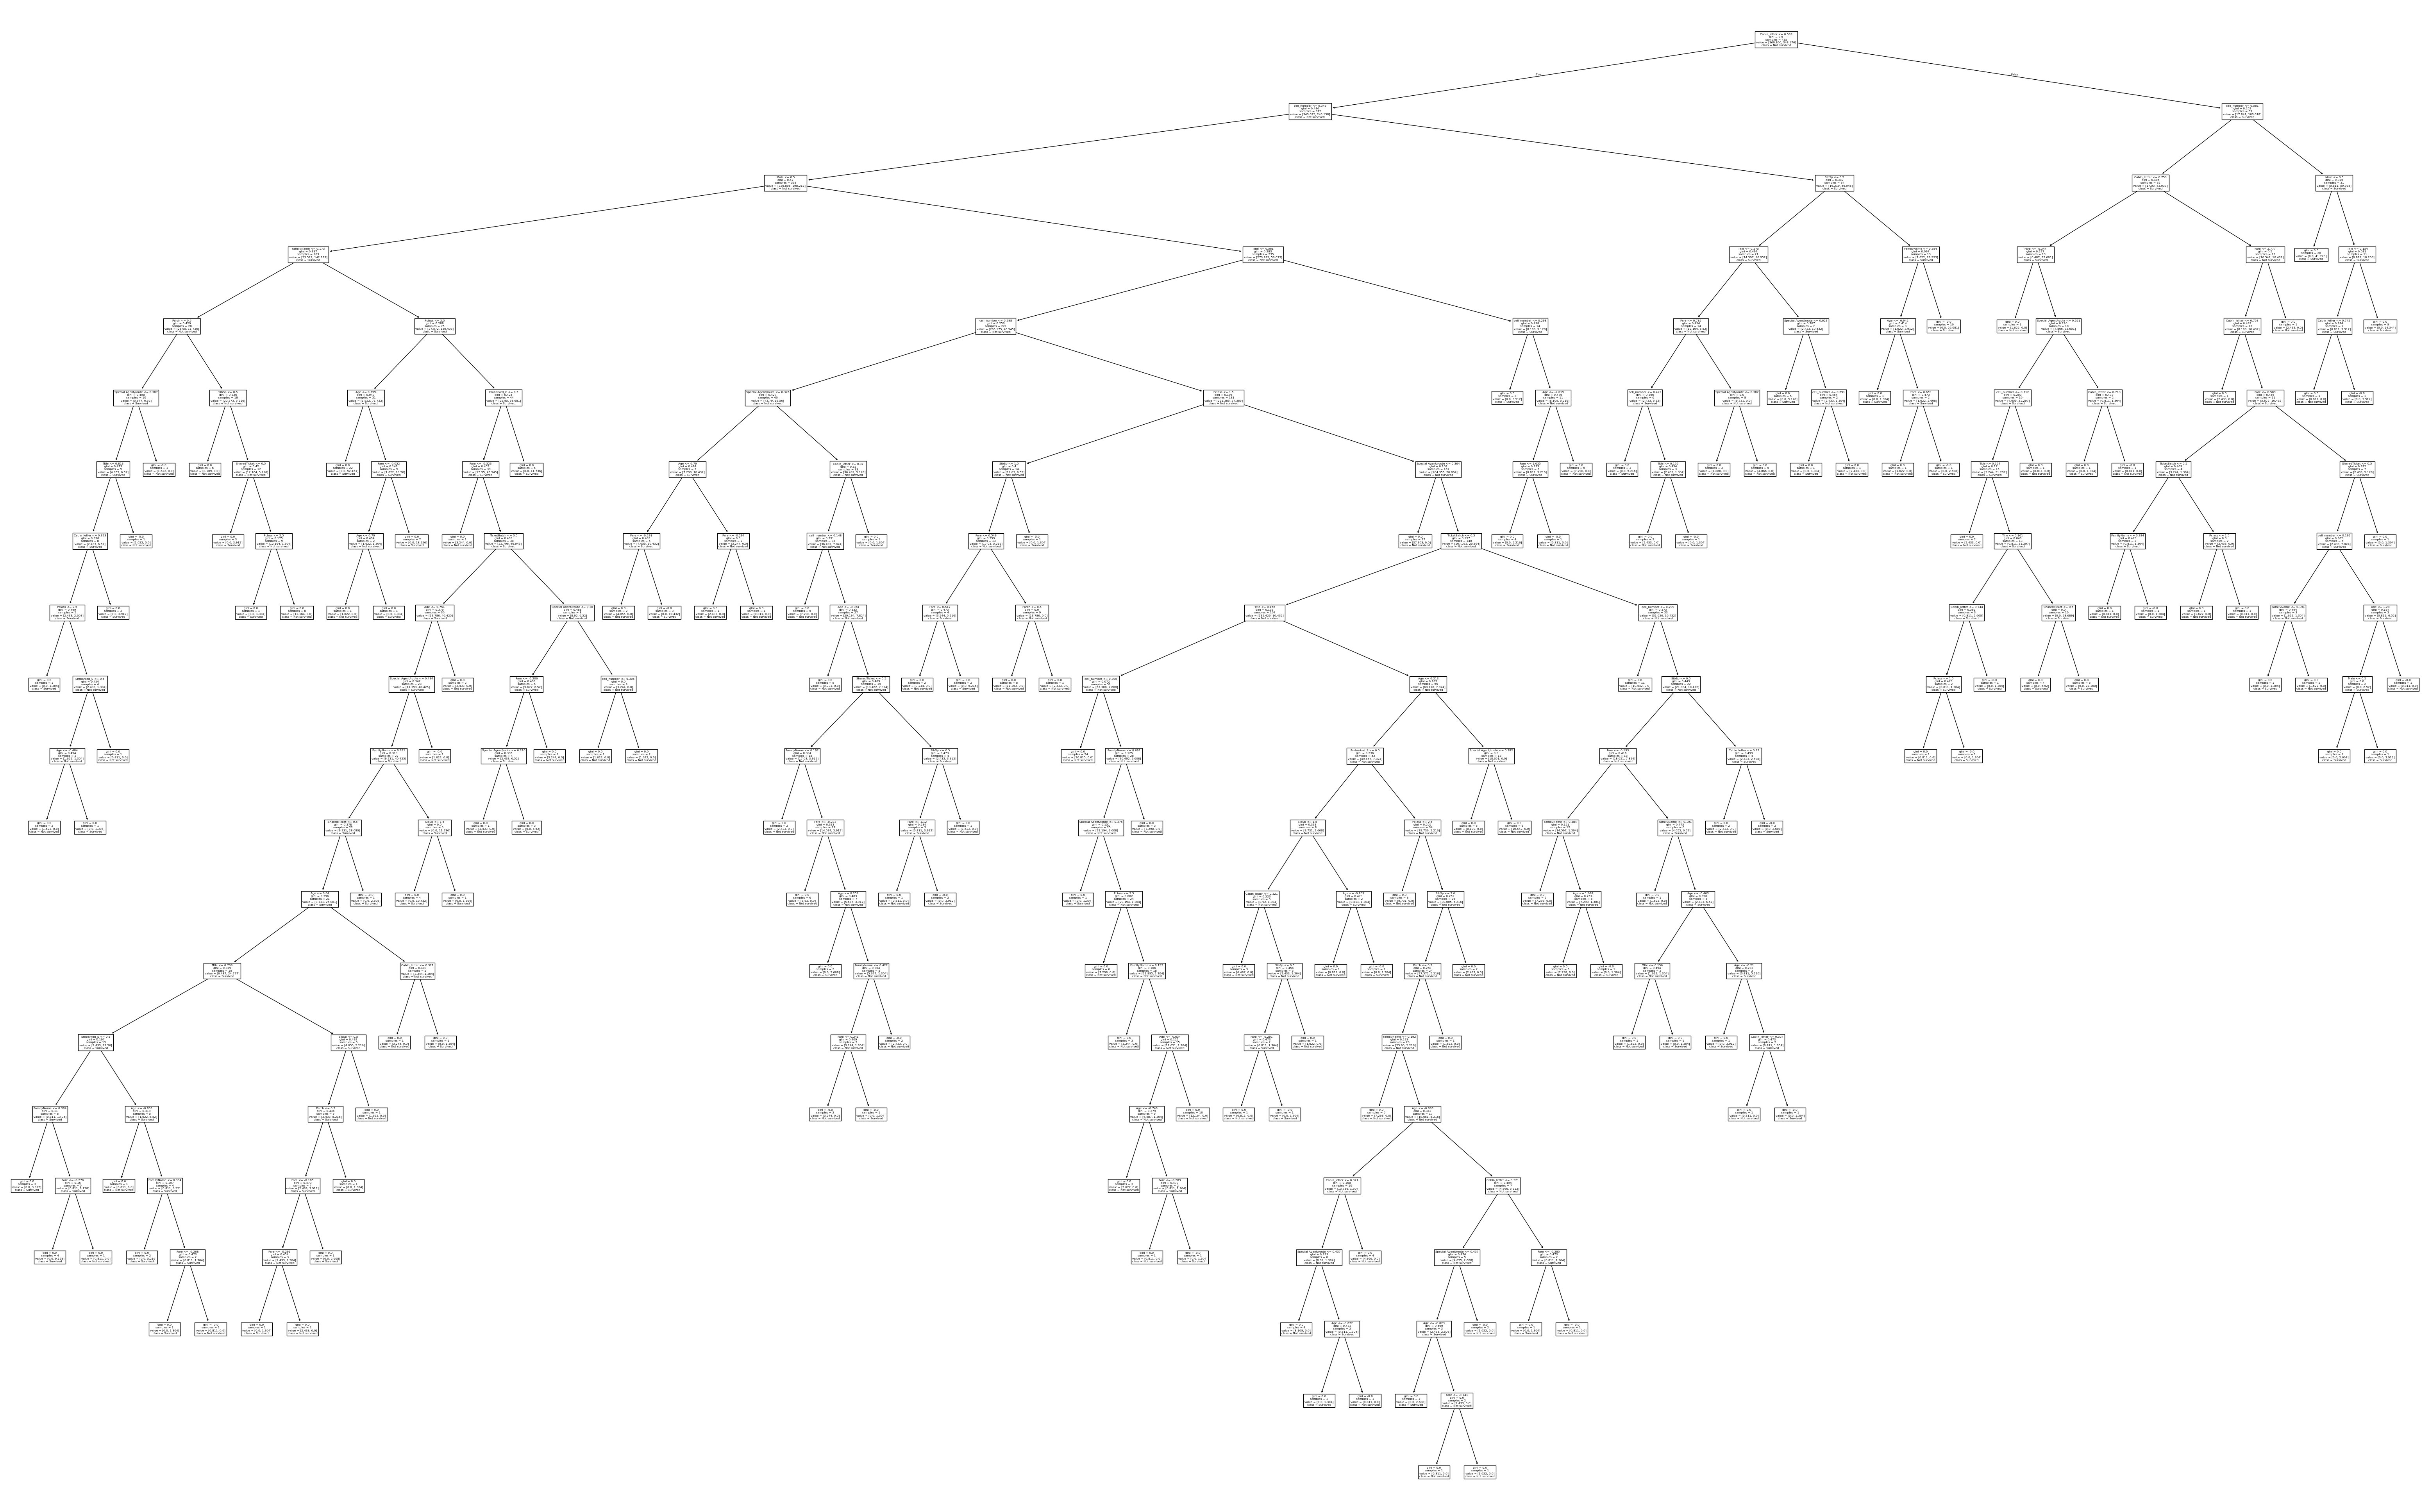

In [76]:
plt.figure(figsize=(80,50)) # plotting random forest diagram
plot_tree(RF_.estimators_[0] , feature_names=X_train.columns , class_names=['Not survived' , 'Survived'])
plt.show()

In [77]:
import joblib

joblib.dump(RF_,'E:\Data science\Titanic dataset\Models\RandomForest.pkl')

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\MinaAlber\AppData\Local\Temp\ipykernel_1212\2424774206.py:3: SyntaxWarning: invalid escape sequence '\D'
  joblib.dump(RF_,'E:\Data science\Titanic dataset\Models\RandomForest.pkl')


['E:\\Data science\\Titanic dataset\\Models\\RandomForest.pkl']

In [78]:
predict_RF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Age                  418 non-null    float64
 3   SibSp                418 non-null    int64  
 4   Parch                418 non-null    int64  
 5   Fare                 418 non-null    float64
 6   cell_number          418 non-null    float64
 7   Cabin_letter         418 non-null    float64
 8   Title                418 non-null    float64
 9   FamilyName           418 non-null    float64
 10  Special Agent/route  418 non-null    float64
 11  TicketBatch          418 non-null    int64  
 12  SharedTicket         418 non-null    int64  
 13  Male                 418 non-null    int64  
 14  Embarked_C           418 non-null    int64  
 15  Embarked_S           418 non-null    int

In [79]:
# save model results as a csv file
save_model_predictions(
    RF_.predict_proba(predict_RF_df.drop('PassengerId' , axis =1))[:, 1] >=0.36,
    'RandomForest'
)